In [2]:
import nltk
import numpy as np
import pandas as pd
import argparse
import string
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

stemmer = nltk.stem.PorterStemmer()

In [3]:
#file_path = 'job_postings_salary.txt'  // Mansheel's file path
file_path = 'job_postings_salary.csv'
all_postings = pd.read_csv(file_path)

all_postings.head()

,combined_text,annual_salary,salary_range,salary_bin
0,Hearing Care Provider Overview\n\nHearingLife ...,63000.0,50k-100k,1
1,Cook descriptionTitle\n\n Looking for a great ...,46321.6,0-50k,0
2,Principal Cloud Security Architect (Remote) Jo...,240895.0,150k+,3
3,"Dishwasher descriptionTitle\n\n $2,000 Sign-on...",40144.0,0-50k,0
4,Insights Analyst - Auto Industry Who We Are\n\...,61000.0,50k-100k,1


In [4]:
# define initial stop words
closed_class_stop_words = ['a','the','an','and','or','but','about','above','after','along','amid','among',\
                           'as','at','by','for','from','in','into','like','minus','near','of','off','on',\
                           'onto','out','over','past','per','plus','since','till','to','under','until','up',\
                           'via','vs','with','that','can','cannot','could','may','might','must',\
                           'need','ought','shall','should','will','would','have','had','has','having','be',\
                           'is','am','are','was','were','being','been','get','gets','got','gotten',\
                           'getting','seem','seeming','seems','seemed',\
                           'enough', 'both', 'all', 'your' 'those', 'this', 'these', \
                           'their', 'the', 'that', 'some', 'our', 'no', 'neither', 'my',\
                           'its', 'his' 'her', 'every', 'either', 'each', 'any', 'another',\
                           'an', 'a', 'just', 'mere', 'such', 'merely' 'right', 'no', 'not',\
                           'only', 'sheer', 'even', 'especially', 'namely', 'as', 'more',\
                           'most', 'less' 'least', 'so', 'enough', 'too', 'pretty', 'quite',\
                           'rather', 'somewhat', 'sufficiently' 'same', 'different', 'such',\
                           'when', 'why', 'where', 'how', 'what', 'who', 'whom', 'which',\
                           'whether', 'why', 'whose', 'if', 'anybody', 'anyone', 'anyplace', \
                           'anything', 'anytime' 'anywhere', 'everybody', 'everyday',\
                           'everyone', 'everyplace', 'everything' 'everywhere', 'whatever',\
                           'whenever', 'whereever', 'whichever', 'whoever', 'whomever' 'he',\
                           'him', 'his', 'her', 'she', 'it', 'they', 'them', 'its', 'their','theirs',\
                           'you','your','yours','me','my','mine','I','we','us','much','and/or'
                           ]
stop_words = set([*nltk.corpus.stopwords.words('english'),
                *closed_class_stop_words])

### Create a Word Cloud to pick out non-insightful words in this specific dataset

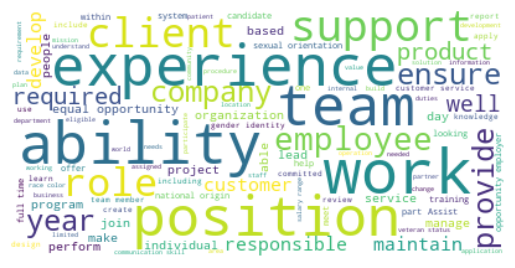

In [5]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join(description for description in all_postings['combined_text'])



wordcloud = WordCloud(stopwords = stop_words,max_font_size=50, max_words=100, background_color='white').generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



'company', 'ability', 'experience', 'year', 'work', 'position', 'employee' are common in every job postings. 
Words such as 'nation','origin','experi', 'opportun','sexual', 'orient', 'race', 'vetaran' are common in job postings' description as Equal Opportunity Employer and can be omitted

In [6]:
# add to stop words
stop_words.update(['company', 'ability', 'experience', 'year',
                    'years', 'work', 'position','work', 'nation','origin', 
                    'opportunity','sexual', 'orient', 'race', 'vetaran', 'requires', 'employee'])


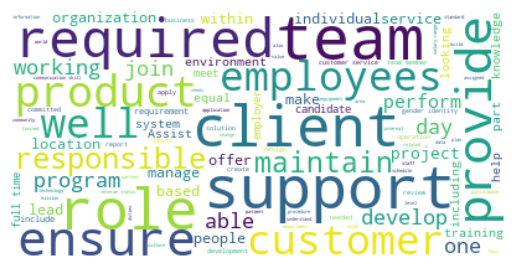

In [7]:
# word cloud after adding more stop words
wordcloud = WordCloud(stopwords = stop_words,max_font_size=50, max_words=100, background_color='white').generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F700-\U0001F77F"  
                           u"\U0001F780-\U0001F7FF"  
                           u"\U0001F800-\U0001F8FF"  
                           u"\U0001F900-\U0001F9FF"  
                           u"\U0001FA00-\U0001FA6F"  
                           u"\U0001FA70-\U0001FAFF"  
                           u"\U00002702-\U000027B0"  
                           u"\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [9]:
def preprocess_text(text):
    text_no_emojis = remove_emojis(text)
    tokens = word_tokenize(text_no_emojis)
    processed_tokens = [stemmer.stem(token.lower()) for token in tokens 
                        if token.lower() not in stop_words and token not in string.punctuation]
    return ' '.join(processed_tokens)

In [10]:
all_postings['processed_description'] = all_postings['combined_text'].apply(preprocess_text)

print(all_postings[['combined_text', 'processed_description']].head())


                                       combined_text  \
0  Hearing Care Provider Overview\n\nHearingLife ...   
1  Cook descriptionTitle\n\n Looking for a great ...   
2  Principal Cloud Security Architect (Remote) Jo...   
3  Dishwasher descriptionTitle\n\n $2,000 Sign-on...   
4  Insights Analyst - Auto Industry Who We Are\n\...   

                               processed_description  
0  hear care provid overview hearinglif nation he...  
1  cook descriptiontitl look great develop profes...  
2  princip cloud secur architect remot job summar...  
3  dishwash descriptiontitl 2,000 sign-on bonu gu...  
4  insight analyst auto industri escal award-win ...  


### Split validation, training and test set

In [11]:
# define target class and input text
target = all_postings['salary_bin'].astype('category')
text = all_postings['processed_description']

In [12]:
from sklearn.model_selection import train_test_split
# split data into 70% training, 10% validation and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(text, target, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125)


### TF-IDF Vectorization

In [13]:
tfidf = TfidfVectorizer()
tfidf_vectorizer = tfidf.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_val_tfidf = tfidf_vectorizer.transform(X_val)


In [14]:
# print the top20 words with the highest tf-idf score in each salary bin
def print_top20_words(X, y, tfidf_vectorizer):
    for i, salary_bin in enumerate(y.cat.categories):
        X_salary_bin = X[y == salary_bin]
        X_salary_bin_tfidf = tfidf_vectorizer.transform(X_salary_bin)
        tfidf_scores = np.array(X_salary_bin_tfidf.mean(axis=0)).flatten()
        top20_word_indices = np.argsort(tfidf_scores)[::-1][:20]
        top20_words = np.array(tfidf_vectorizer.get_feature_names_out())[top20_word_indices]
        print(f'Top 20 words in salary bin {salary_bin}: {top20_words}')

print_top20_words(X_train, y_train, tfidf_vectorizer)

Top 20 words in salary bin 0: ['custom' 'servic' 'sale' 'store' 'requir' 'job' 'product' 'includ' 'team'
 'assist' 'hour' 'time' 'employ' 'provid' 'manag' 'commun' 'perform'
 'shift' 'benefit' 'patient']
Top 20 words in salary bin 1: ['manag' 'team' 'client' 'account' 'requir' 'includ' 'servic' 'project'
 'custom' 'sale' 'support' 'commun' 'skill' 'provid' 'busi' 'develop'
 'job' 'applic' 'product' 'process']
Top 20 words in salary bin 2: ['manag' 'project' 'develop' 'team' 'engin' 'busi' 'data' 'design'
 'includ' 'client' 'product' 'requir' 'support' 'account' 'system' 'plan'
 'applic' 'financi' 'program' 'provid']
Top 20 words in salary bin 3: ['manag' 'busi' 'team' 'develop' 'engin' 'sale' 'product' 'data' 'project'
 'market' 'design' 'includ' 'role' 'custom' 'softwar' 'technolog' 'lead'
 'build' 'technic' 'client']
